Task 1: (Preprocessing) Loading in the datasets.

In [194]:
# ECE471/571 project 2
# Ken Boling
# Python 3.6.2
# Pycharm Development Environment
# Juypter Notebook


# resets all variables within the Jupyter notebook so things don't get weird if I run this again 
%reset -f


# Data management tools:
import pandas as pd
import numpy as np

# Plotting tools:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# other tools:
import os
import time

# Juypter Notebook tools:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
#InteractiveShell.ast_node_interactivity = "all"

# Select output directroy for figures etc.
outputdir = 'C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\project 2'

# Loading data from files into Pandas dataframes
pimatr_X = pd.read_csv('C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\Project 2\\pima.tr', delim_whitespace=True)
pimate_X = pd.read_csv('C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\Project 2\\pima.te', delim_whitespace=True)

# Checking the loaded data:

display(pimatr_X.head())
display(pimatr_X.info())

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
npreg    200 non-null int64
glu      200 non-null int64
bp       200 non-null int64
skin     200 non-null int64
bmi      200 non-null float64
ped      200 non-null float64
age      200 non-null int64
type     200 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 12.6+ KB


None

Each sample in the data set has 7 dimensions. The classification result is 'no': (no diabetes) or 'yes' (diabetes)
Before you can use the dataset, you need to do some preprocessing
	Change 'yes' and 'no' to 1 and 0 indicating 'with disease' and 'without disease'.
	Delete the first row in the data set
Because of the properties of a Pandas Dataframe this step isn't needed, so I will keep the column names to use as identifiers, and rename the 'type' column to something that makes more sense to me:

(note from future Ken: this ended up making things more complicated in terms of having to deal with a string feature, I should have just listened...)

In [195]:
pimatr_X.rename(columns = {'type': 'diabetes'}, inplace=True)
pimate_X.rename(columns = {'type': 'diabetes'}, inplace=True)

"Normalize the data set to make the features comparable (or with the same scale).Suppose x is a sample vector, m_i is the mean of each feature i, sigma_i is the standard deviation of each feature i, then normalization is conducted by (x-m_i)/sigma_i. Keep in mind that you also need to normalize the samples in the test set. For each sample in the test set, use the same m_i and sigma_i you derived from the training set."

Create a function to normalize the data using the values for mu and sigma calculated from the training set

First I want to calculate the values of mu and sigma for each feature in the training data set and calculate the covarience matrix for the normalized data:

In [196]:
# Normalization function
def normalize(dfX, mui, sigmai):
    dfnum = dfX.select_dtypes(include=np.number)
    dfobj = dfX.select_dtypes(include=object)
    dfnorm = (dfnum - mui)/sigmai
        
    dfout = pd.concat([dfnorm,dfobj],axis=1)
    
    return dfout

# Calculate Mu and Sigma
mui = np.mean(pimatr_X, axis=0)
sigmai = np.std(pimatr_X,axis=0)

print ('Mui (Mean before normalization)', mui, mui.shape, "\n", 
       'Sigmai (Standard Deviation before normalization)', 
       sigmai,sigmai.shape,sep="\n")



Mui (Mean before normalization)
npreg      3.570000
glu      123.970000
bp        71.260000
skin      29.215000
bmi       32.310000
ped        0.460765
age       32.110000
dtype: float64
(7,)


Sigmai (Standard Deviation before normalization)
npreg     3.357842
glu      31.587958
bp       11.450869
skin     11.695246
bmi       6.114867
ped       0.306456
age      10.947963
dtype: float64
(7,)


In [197]:

# run the normalization on each dataset:    
pimatr_nX = normalize(pimatr_X, mui, sigmai)
pimate_nX = normalize(pimate_X, mui, sigmai)


mui_tr = np.mean(pimatr_nX, axis=0)
sigmai_tr = np.std(pimatr_nX,axis=0)

print ('Mui (Mean after normalization)', mui_tr, mui.shape, "\n", 'Sigmai (Standard Deviation after normalization)', sigmai_tr,sigmai.shape,sep="\n")

#display(pimatr_nX.head())


Mui (Mean after normalization)
npreg    2.664535e-17
glu      3.552714e-17
bp      -4.263256e-16
skin     3.552714e-17
bmi     -3.907985e-16
ped     -1.298961e-16
age      7.105427e-17
dtype: float64
(7,)


Sigmai (Standard Deviation after normalization)
npreg    1.0
glu      1.0
bp       1.0
skin     1.0
bmi      1.0
ped      1.0
age      1.0
dtype: float64
(7,)


Just to further check that the normalization is working I will plot two features and see what they look like before and after.

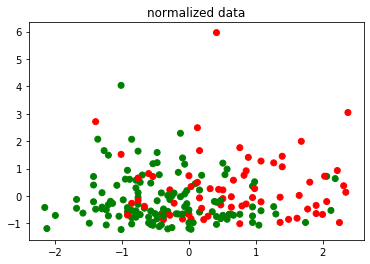

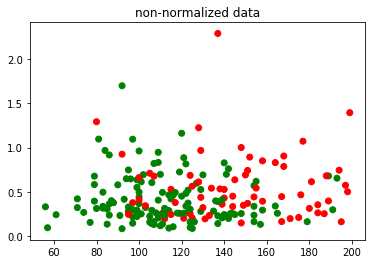

In [198]:

fig1, ax = plt.subplots()
colordef = ['red' if i == 'Yes' else 'green' for i in pimatr_nX['diabetes']]
ax.scatter(x=pimatr_nX['glu'], y=pimatr_nX['ped'], c=colordef, label=pimatr_nX['diabetes'])
ax.set_title('normalized data')

plt.show()

fig2, ax = plt.subplots()
ax.scatter(x=pimatr_X['glu'], y=pimatr_X['ped'], c=colordef, label=pimatr_X['diabetes'])
ax.set_title('non-normalized data')

plt.show()


Looks good!  The normalization shifted the mean to zero (not exactly zero but very close, probablty because of floating point rounding issues) 
 
Now to calculate the covarience matrix:

In [199]:
# function to calculate the covariance matrix from a data set
def covmat(matrix):

    d = matrix.ndim # gets the number of dimensions in the matrix
    Ei = np.zeros([d , d]) # Creates an array of 0s that is d by d
    n = np.shape(matrix)[0] #numberr of rows in the matrix

    summ = (np.sum(matrix, axis = 0)) #sum of each column of the matrix
    muv = np.array([[(1/n)* summ[0]],[(1/n)* summ[1]]]) #calculates Mu vector

    for irow in matrix: # for loops iterate through the rows of an numpy array by default
        xrow = irow.reshape(-1,1) #converts the row vector to a column vector
        isum = np.outer([(xrow - muv)] , [(np.transpose(xrow) - np.transpose(muv))]) # calculate (x - mu)(x - mu)T for that row
        Ei = Ei + isum # adds the matrices to the total

    covmatrix = ((1 / (n-1)) * Ei )

    return covmatrix

def covnum(df):
        #num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
        #dfcol_select = df[num_cols]
        dfnum = df.select_dtypes(include=np.number)
        #cov = np.cov(dfnum,rowvar=False)
        cov = np.cov(dfnum,rowvar=False)

        return pd.DataFrame(cov)


In [200]:
pimatr_nX_cov= covnum(pimatr_nX)
#pimatr_nX_cov1= covmat(pimatr_nX)

print('Covariance Matrix for normalized data:')
pd.DataFrame(pimatr_nX_cov)

#pimatr_nX_cov.to_csv('pimatr_nX_cov.csv')
#pd.DataFrame(pimatr_nX_cov1)


Covariance Matrix for normalized data:


,0,1,2,3,4,5,6
0,1.005025,0.171382,0.253328,0.109597,0.058629,-0.120073,0.601932
1,0.171382,1.005025,0.270735,0.218690,0.217879,0.061015,0.345133
2,0.253328,0.270735,1.005025,0.266295,0.240021,-0.047638,0.393039
3,0.109597,0.218690,0.266295,1.005025,0.662347,0.095882,0.253192
4,0.058629,0.217879,0.240021,0.662347,1.005025,0.191508,0.132582
5,-0.120073,0.061015,-0.047638,0.095882,0.191508,1.005025,-0.071768
6,0.601932,0.345133,0.393039,0.253192,0.132582,-0.071768,1.005025


Now I will calculate the Eiganvalues and Eiganvectors for the covarience matrix, and put them into a data structure that can be used more easily: 

In [201]:


eigvals_nX, eigvecs_nX = np.linalg.eig(pimatr_nX_cov)

# display the data
pd.DataFrame(eigvals_nX)
pd.DataFrame(eigvecs_nX)


eig_pairs_nX = [(np.abs(eigvals_nX[i]), eigvecs_nX[:, i]) for i in range(len(eigvals_nX))]

pd.DataFrame(eig_pairs_nX)

df_eig = pd.DataFrame(eig_pairs_nX)

df_eig.to_csv('pca_eig.csv')


Now we will sort the Eiganvalues and Eiganvectors that will become the pricipal components and determine the percentage of total varience explained by each.  We will use this to determine the components that can be excluded to reduce the dimentionality of the data.  

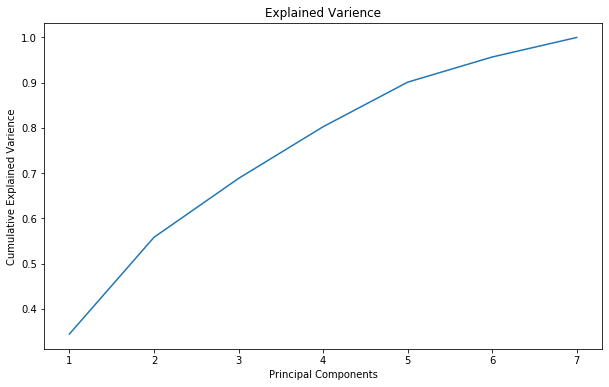

,0
0,0.344180
1,0.557958
2,0.688225
3,0.802507
4,0.901098
5,0.956786
6,1.000000


In [203]:
# sort the Eiganvalues and corresponing Eiganvectors:
eig_pairs_nX.sort(key=lambda x: x[0], reverse=True)

eig_pairs_X = pd.DataFrame(eig_pairs_nX)

PCnum = np.array([[1],[2],[3],[4],[5],[6],[7]])

var_exp = [(i / (sum(eigvals_nX))) for i in sorted(eigvals_nX, reverse=True)]
cum_var_exp = np.cumsum(var_exp)



fig3, ax = plt.subplots(figsize=[10,6])

plt.plot(PCnum, cum_var_exp)
ax.set_title('Explained Varience')
ax.set_xlabel('Principal Components' )
ax.set_ylabel('Cumulative Explained Varience' )
plt.savefig((os.path.join(outputdir, 'Project 2 explained varience  plot') + '.png'), dpi=600)
plt.show()

pd.DataFrame(cum_var_exp)

In [210]:
matrix_w = np.hstack((eig_pairs_nX[0][1].reshape(7, 1),
                      eig_pairs_nX[1][1].reshape(7, 1),
                      eig_pairs_nX[2][1].reshape(7, 1),
                      eig_pairs_nX[3][1].reshape(7, 1),
                      eig_pairs_nX[4][1].reshape(7, 1)
                      ))
pd.DataFrame(matrix_w)


,0,1,2,3,4
0,0.365493,0.462526,-0.085599,0.500593,0.132269
1,0.366002,0.012743,-0.418270,-0.680105,0.444888
2,0.412573,0.108116,0.089982,-0.334982,-0.823943
3,0.431537,-0.414656,0.336837,0.133054,0.154327
4,0.391213,-0.512878,0.241103,0.113808,0.103888
5,0.029135,-0.449834,-0.785018,0.324426,-0.259385
6,0.471296,0.369980,-0.147593,0.196835,0.061703


In [211]:

def transformpca(df,matrix_w):
    dfnum = df.select_dtypes(include=np.number)
    dfobj = df.select_dtypes(include=object)
    dft= dfnum.dot(matrix_w) 
    dfcon = pd.concat([dft,dfobj],axis=1)
    dfout = dfcon.rename(columns={0:'Principal Component 1',1:'Principal Component 2',2:'Principal Component 3',3:'Principal Component 4',
                                  4:'Principal Component 5'})
    
    return dfout

    
pimatr_pX = transformpca(pimatr_nX, matrix_w)
pimate_pX = transformpca(pimate_nX, matrix_w)


print(pimatr_pX.head(10))



   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.939903               0.238894               0.679724   
1               1.786419               2.170387              -0.758981   
2               0.751950               0.113891               1.888647   
3               1.481443              -2.137107               1.195894   
4              -1.947877               0.213475               0.835228   
5               0.991065               0.827095               0.367709   
6              -1.139267              -0.507577               0.998158   
7              -1.474267              -0.079899              -2.037172   
8               1.247997               1.934400              -0.309855   
9               1.133787              -2.506621              -1.242974   

   Principal Component 4  Principal Component 5 diabetes  
0               0.824724              -0.259558       No  
1              -0.975913               1.534656      Yes  
2       

In [212]:
# just to compare lets see what the pca with sklearn looks like: 
from sklearn import decomposition

# PCA FUNCTION
def pca(df, class_column):
    pca = decomposition.PCA(n_components=5)
    num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
    pca.fit(df[num_cols])
    df_transformed = pd.DataFrame(data=pca.transform(df[num_cols]))
    print('explained variance',pca.explained_variance_  )
    print('explained variance ratio',pca.explained_variance_ratio_)
    print('explained variance cumulative',np.sum(pca.explained_variance_ratio_))
    print('components_',pca.components_ )
    
    df_transformed_output = pd.concat([df_transformed, df[class_column]], axis=1)
    
    return df_transformed_output


explained variance [2.42136801 1.50396726 0.91644987 0.80399111 0.69360322]
explained variance ratio [0.34418017 0.2137782  0.1302668  0.11428159 0.09859074]
explained variance cumulative 0.9010975094755013
components_ [[ 0.36549332  0.36600186  0.41257275  0.43153727  0.39121306  0.02913468
   0.47129619]
 [-0.46252565 -0.01274298 -0.1081158   0.414656    0.51287765  0.44983379
  -0.36997986]
 [ 0.08559894  0.41826987 -0.08998228 -0.33683691 -0.24110317  0.78501771
   0.14759294]
 [ 0.50059302 -0.68010455 -0.33498173  0.13305369  0.11380797  0.32442578
   0.19683508]
 [-0.13226904 -0.4448877   0.82394333 -0.15432682 -0.10388828  0.25938476
  -0.06170272]]
            0         1         2         3         4 diabetes
0   -0.939903 -0.238894 -0.679724  0.824724  0.259558       No
1    1.786419 -2.170387  0.758981 -0.975913 -1.534656      Yes
2    0.751950 -0.113891 -1.888647  0.838642  0.888947       No
3    1.481443  2.137107 -1.195894 -1.430746 -0.679286       No
4   -1.947877 -0.213

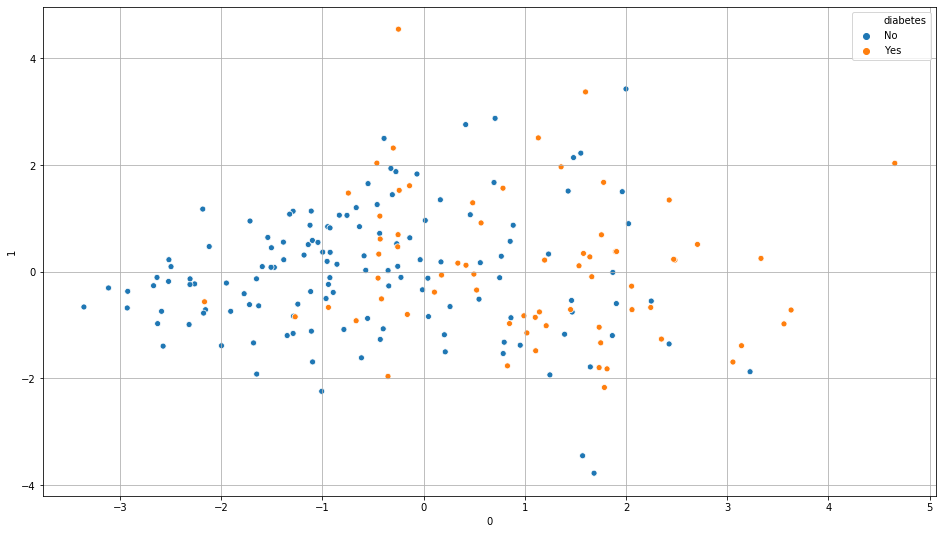

          0         1         2         3         4 diabetes
0 -0.939903 -0.238894 -0.679724  0.824724  0.259558       No
1  1.786419 -2.170387  0.758981 -0.975913 -1.534656      Yes
2  0.751950 -0.113891 -1.888647  0.838642  0.888947       No
3  1.481443  2.137107 -1.195894 -1.430746 -0.679286       No
4 -1.947877 -0.213475 -0.835228 -0.506174 -0.500626       No
5  0.991065 -0.827095 -0.367709  0.961222  0.455764      Yes
6 -1.139267  0.507577 -0.998158  0.982466 -0.477533       No
7 -1.474267  0.079899  2.037172 -1.457285 -1.907353       No
8  1.247997 -1.934400  0.309855 -0.609575  0.188640       No
9  1.133787  2.506621  1.242974  0.563146  0.852876      Yes
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.939903               0.238894               0.679724   
1               1.786419               2.170387              -0.758981   
2               0.751950               0.113891               1.888647   
3               1.481443         

<Figure size 432x432 with 0 Axes>

In [215]:
pimatr_pX_sk = pca(pimatr_nX,'diabetes')
print(pimatr_pX_sk)
pimatr_pX_sk_target = pimatr_nX['diabetes']

#df_pimatr_pX = pd.DataFrame(pimatr_pX_sk)
#df_pimatr_pX_sk_target = pd.DataFrame(pimatr_pX_sk_target)

plt.figure(figsize=[16,9])
sns.scatterplot(x=pimatr_pX_sk.iloc[:,0], y=pimatr_pX_sk.iloc[:,1], hue=pimatr_pX_sk_target)
plt.grid()
plt.savefig((os.path.join(outputdir, 'Project 2 PCA plot sk') + '.png'), dpi=600)
plt.show()
 

fig = plt.figure(figsize=(6,6))

print(pimatr_pX_sk.head(10))
print(pimatr_pX.head(10))


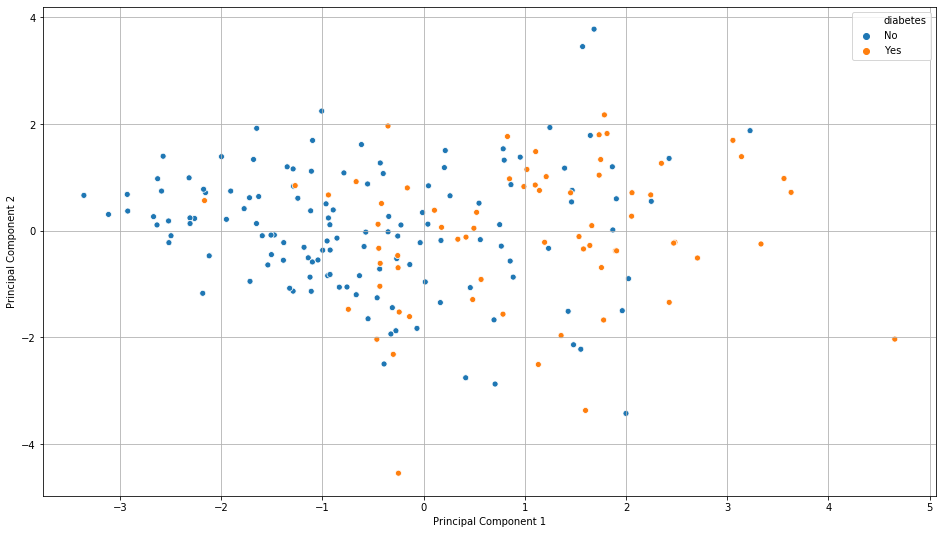

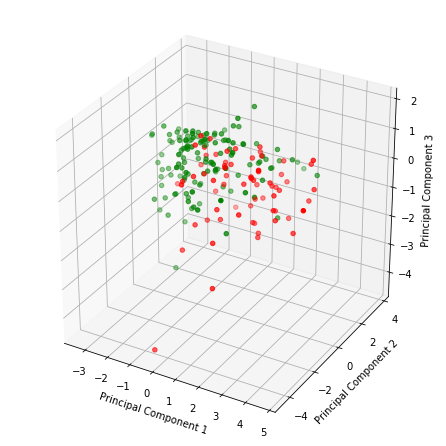

In [220]:
plt.figure(figsize=[16,9])
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pimatr_pX, hue='diabetes')
plt.grid()
plt.savefig((os.path.join(outputdir, 'Project 2 PCA plot') + '.png'), dpi=600)
plt.show()



fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = pimatr_pX['Principal Component 1']
y = pimatr_pX['Principal Component 2']
z = pimatr_pX['Principal Component 3']
c= ['red' if i == 'Yes' else 'green' for i in pimatr_pX['diabetes']]


ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.savefig((os.path.join(outputdir, 'Project 2 PCA plot 3d') + '.png'), dpi=600)

plt.show()

In [224]:
# **** fishers linear discrimiant

pimatr_nX_cl0 = pimatr_nX[(pimatr_nX.diabetes == 'Yes')]
pimatr_nX_cl1 = pimatr_nX[(pimatr_nX.diabetes == 'No')]

def fisherld(df):
    num_dict = {'Yes': 0,'No':1}
    df['diabetes'].replace(num_dict)
    cov_1 = np.cov(df[['diabetes']==0])
    cov_2 = np.cov(df[['diabetes']==1])
    
    mu1 = np.mean(df[['diabetes']==0])
    mu2 = np.mean(df[['diabetes']==1])
    SW = cov_1 + cov_2    
    SB = np.dot((mu1 - mu2),np.transpose((mu1 - mu2)))
    W = np.dot(np.linalg.inv(SW),(mu1-mu2).reshape(2,1))
    print(cov_1,cov_2,SW)

    return W

    


    

In [225]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def sk_LDA(train_df, test_df):
    num_cols = train_df.columns[train_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
    num_dict = {'Yes': 0,'No':1}
    X = train_df[num_cols]
    X_test  = test_df[num_cols]
    X_arr = X.to_numpy(dtype='float64')
    X_test_arr = X_test.to_numpy(dtype='float64')

    print(X_arr.shape)
    df_y = train_df['diabetes']
    df_y_te = test_df['diabetes']

    y =  np.asarray(df_y.replace(num_dict))
    print(y.shape)

    LDA = LinearDiscriminantAnalysis(store_covariance=True,solver='eigen')
    output = LDA.fit(X=X_arr,y=y).transform(X_arr)
    df_training_transformed = pd.DataFrame(output,columns=['FLD'])
    
    df_training_output = pd.concat([df_training_transformed,df_y],axis=1)
    
    testing_set_transformed = LDA.transform(X_test_arr)
    df_testing_transformed = pd.DataFrame(testing_set_transformed,columns=['FLD'])

    df_testing_output = pd.concat([df_testing_transformed,df_y_te],axis=1)

    
    print(LDA.intercept_)
    
    W = LDA.coef_ #Weight vectors
    print(LDA.coef_ )
    return df_training_output, df_testing_output, output, y, W, 


(200, 7)
(200,)
[1.0362893]
[[-0.40963682 -1.16487405  0.03185011  0.01492697 -0.46437769 -0.5892693
  -0.52814779]]


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 1152x648 with 0 Axes>

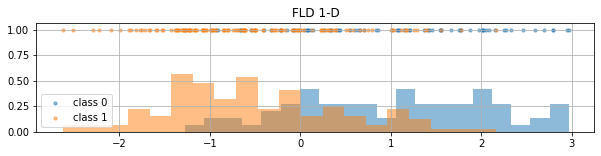

In [238]:

df_pimatr_fX, df_pimate_fX, pimatr_fX, pimatr_fX_sk_target, Wv_fX_tr = sk_LDA(train_df=pimatr_nX,test_df=pimate_nX)



#pimate_fX, pimate_fX_sk_target, Wv_fX_te  = sk_LDA(df=pimate_nX)



#pimatr_fX_sk_target = pimatr_nX['diabetes'].copy() 

#num_dict = {'Yes': 0,'No':1}

# convert yea and no to 0 and 1 for the target variables

#pimatr_fX_sk_target= pimatr_fX_sk_target.replace(num_dict) 


#print(pimatr_fX)
plt.figure(figsize=[16,9])
markers = ['s','x','o']
colors = ['r','g','b']
fig = plt.figure(figsize=(10,2))
plt.title('FLD 1-D')

ax0 = fig.add_subplot(111)
#ax0.title('FLD 1-d')
ax0.scatter(x=pimatr_fX[pimatr_fX_sk_target==0],y=np.ones(len(pimatr_fX[pimatr_fX_sk_target==0])), alpha=0.5,s=10, label='class 0')
ax0.scatter(x=pimatr_fX[pimatr_fX_sk_target==1],y=np.ones(len(pimatr_fX[pimatr_fX_sk_target==1])), alpha=0.5,s=10, label='class 1')
plt.grid()
plt.legend()

ax1 = fig.add_subplot(111)
ax1.hist(x=pimatr_fX[pimatr_fX_sk_target==0], alpha=0.5,label='class 0', density=True, histtype='stepfilled',bins=20)
ax1.hist(x=pimatr_fX[pimatr_fX_sk_target==1], alpha=0.5,label='class 1', density=True, histtype='stepfilled',bins=20)

plt.savefig((os.path.join(outputdir, 'Project 2 FLD plot sk') + '.png'), dpi=600)
plt.show()


#for l,m,c in zip(np.unique(pimatr_fX_sk_target),markers,colors):
  #  ax0.scatter(pimatr_fX[:,0][pimatr_fX_sk_target==l],pimatr_fX[:,1][pimatr_fX_sk_target==l],c=c,marker=m)

#DP = np.dot(D, Wv).T * Wv / (np.dot(Wv,Wv))

#sns.scatterplot(x=pimatr_fX[:,0], y=pimatr_fX[:,1], hue=pimatr_pX_sk_target)


In [227]:
fldclasss0 = pd.concat([transformpca(trclass0,matrixWclass0),pimatr_nX_cl0['diabetes']], axis=1)
fldclasss1 = pd.concat([transformpca(trclass1,matrixWclass1),pimatr_nX_cl1['diabetes']], axis=1)

tr_fld = pd.concat([fldclasss0,fldclasss1], axis=0)

plt.figure(figsize=[16,9])
sns.scatterplot('Principal Component 1', 'Principal Component 2', data=tr_fld, hue='diabetes')
plt.grid()
plt.savefig((os.path.join(outputdir, 'Project 2 FLD plot') + '.png'), dpi=600)
plt.show()

NameError: name 'trclass0' is not defined

In [235]:
# Case 1 (Euclidean Distance)
# Define the Case 1 function

def euclidist(X, muv1, muv2, class_column):
    
    classes = pd.DataFrame(data=X[class_column])
    
    start = time.time() # timer
    df_testing_num = pd.DataFrame(X.select_dtypes(include=np.number))
    
    
    
    #xy = X[X.columns[:2]]
    
    # creates two new columns with the distance of each point from the mean of each class 
    euclid_dist_class_0 = np.sqrt(np.sum(np.power(np.subtract(df_testing_num, muv1.T),2),axis=1))
    euclid_dist_class_1 = np.sqrt(np.sum(np.power(np.subtract(df_testing_num, muv2.T),2),axis=1))

    # selects the class based on the smaller of the two
    conditions = (euclid_dist_class_0 < euclid_dist_class_1, 
                  euclid_dist_class_0 > euclid_dist_class_1 )
    choices = ('Yes' , 'No')
    results = np.select(conditions, choices)
    
    output = pd.DataFrame(results,columns=['case_1_class'],index=X.index)
    #classes['case_1_class']
    # I don't remember why I put this here, but I probably should not touch it... too late...
    Xout = pd.DataFrame(data=pd.concat([output,classes],axis=1))
    
    # prints 
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    
    return Xout


In [256]:
# Case 2 (Mahalanobis Distance)

# Define the Case 2 function:

def mahalanobisdist2(X, E1, E2, muv1, muv2):
    start = time.time() # timer started
    df_testing_num = pd.DataFrame(X.select_dtypes(include=np.number))

    #xy = np.array(X.iloc[:,:2]) # select all rows in the first 2 columns
    case_2_class = [] #emtpy data object to add reslts to
    for irow in df_testing_num:
        xrow = irow.T #converts the row vector to a column vector
        
        # Calculates the mahalanobis distance between each data point 
        # and the mean determined for each class 
        
        md1 = np.dot(np.dot((xrow - muv1).T , np.linalg.inv(E1)),(xrow - muv1))
                           
        md2 = np.dot(np.dot((xrow - muv2).T , np.linalg.inv(E2)) ,(xrow - muv2))
        
        g1 = -md1/2
        g2 = -md2/2

        conditions = (g1 > g2, g1 < g2)
        choices = ('Yes' , 'No')
        select = np.select(conditions, choices)
        case_2_class.append(select)


        
    discrim = pd.DataFrame(np.concatenate(case_2_class))
    discrim.rename(columns={0: 'case_2_class'}, inplace=True)

    Xout = pd.concat([X, discrim], axis=1)

    # prints 
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    return Xout


In [257]:
# Case 3 (Maximum A-Priori Probability, Mahalanobis Distance)

# Define the Case 3 function:

def case_3_discrim(X, E1, E2, muv1, muv2):
    start = time.time() # timer started
    xy = np.array(X.iloc[:,:2]) # select all rows in the first 2 columns
    case_2_class = [] #emtpy data object to add reslts to
    for irow in xy:
        xrow = irow.reshape(-1,1) #converts the row vector to a column vector
        test1 = (xrow - muv1)
        #print(test1)

        # Calculates the mahalanobis distance between each
        #  data point and the mean determined for each class 
          
        md1 = np.dot(np.dot((xrow - muv1).T , np.linalg.inv(E1)),(xrow - muv1)) 
                           
        md2 = np.dot(np.dot((xrow - muv2).T , np.linalg.inv(E2)) ,(xrow - muv2))
        
        g1 = -md1/2 - ((np.log(np.linalg.det(E1)))/2)
        g2 = -md2/2 - ((np.log(np.linalg.det(E2)))/2)

        #md1 = np.sqrt(
                   # np.dot(
        #                np.dot((xrow - muv1).T , np.linalg.inv(E1)) 
         #                   ,(xrow - muv1)))
       # md2 = np.sqrt(
        #            np.dot(
        #                np.dot((xrow - muv2).T , np.linalg.inv(E2)) 
        #                    ,(xrow - muv2)))
        conditions = (g1 > g2, g1 < g2)
        choices = (0, 1)
        select = np.select(conditions, choices)
        case_2_class.append(select)


        
    discrim = pd.DataFrame(np.concatenate(case_2_class))
    discrim.rename(columns={0: 'case_2_class'}, inplace=True)

    Xout = pd.concat([X, discrim], axis=1)

    # prints 
    end = time.time()
    print ('time to complete:', end - start, 'seconds')
    return Xout



In [253]:

def error_rates(truecol, testcol):
    dict = {'Yes': 0,'No':1}
    test = np.array(testcol.replace(dict))
    np.reshape(test,(-1,1))
    
    truth = np.array(truecol.replace(dict))
    truth.reshape(-1,1)
    
    #table = (truth == 1) & (test == 0)
   # print(table)


    #discriminator
    conditions = [(truth == 0) & (test == 0),
                  (truth == 0) & (test == 1),
                  (truth == 1) & (test == 1),
                  (truth == 1) & (test == 0)] 
    choices = ['TP', 'FP', 'TN','FN']
    error_def = np.select(conditions,choices)
    
    #'True Positive Rate (TPR) or Sensitivity = TP / (TP + FN)'
    #'True Negative Rate (TNR) or Specificity = TN / (FP + TN)'
    #rate = error_def.groupby('error2', as_index=False).size()

    #the pandas groupby function was used to get the total counts of the errors for each class
    labels,count = np.unique(error_def, return_counts=True)
    df_rates = pd.DataFrame(count,index=labels)
    df_rates_t = df_rates.T
    
    df_rates_t['TPR'] = (df_rates_t['TP'])/(df_rates_t['TP'] + df_rates_t['FN'])
    df_rates_t['FPR']  = (df_rates_t['FP'])/(df_rates_t['FP'] + df_rates_t['TN'])
    df_rates_t['Acc']  =  (df_rates_t['TN'] + df_rates_t['TP'])/(df_rates_t['TN']+df_rates_t['TP']+df_rates_t['FN']+ df_rates_t['FP']) 
    print(df_rates_t)

    #print(df_rates_t)

    return df_rates_t



In [232]:
####
def Kens_kNNnew(df_training, class_column, df_testing, k ):
    start = time.time()
    df_training_num = pd.DataFrame(df_training.select_dtypes(include=np.number))
    df_testing_num = pd.DataFrame(df_testing.select_dtypes(include=np.number))
    kNNlist = []

    def rowply(row):
       
        Xdist = pd.DataFrame(np.sqrt(np.sum(np.power(np.subtract(df_training_num, row.T), 2), axis=1)))
        
        Xdist.rename(columns={0: 'dist'}, inplace=True)
        trdataX = pd.concat([Xdist, df_training[class_column]], axis=1)
        test1 = trdataX.nsmallest(n=k, columns='dist', keep='first')

        test2 = test1.groupby(class_column).size().reset_index()

        test2.rename(columns={0: 'count'}, inplace=True)

        test3 = test2.nlargest(n=1, columns='count', keep='first')

        kNNlist.append(test3[class_column].values)

        return

    df_testing_num.apply(rowply, axis=1)

    kNNclasslistapp = pd.DataFrame(np.concatenate(kNNlist),index=df_testing.index)
    kNNclasslistapp.rename(columns={0: 'kNN_class'}, inplace=True)
    Xout = pd.concat([df_testing, kNNclasslistapp], axis=1)
    end = time.time()
    print('kNN time to complete:', end - start, 'seconds')
    return Xout



In [233]:

def errorchk(df, truecol, testcol, title, x, y):
    
    start = time.time() #timer
    
    #discriminator
    conditions = (truecol == 0 and testcol == 0,
                  truecol == 0 and testcol == 1,
                  truecol == 1 and testcol == 1,
                  truecol == 1 and testcol == 0) 
    choices = ('TP', 'FP', 'TN','FN')
    df['error1'] = np.select(conditions,choices)
    
    #the pandas groupby function was used to get the total counts of the errors for each class
    rate = df.groupby('error1', as_index=False).size()
    TPR = (rate['TP'])/(rate['TP'] + rate['FN'])
    TNR = (rate['TN'])/(rate['FP'] + rate['TN'])

    'True Positive Rate (TPR) or Sensitivity = TP / (TP + FN)'
    'True Negative Rate (TNR) or Specificity = TN / (FP + TN)'
    
    #accuracy = (rate['correct'])/(rate['correct'] + rate['error'])
    #print ('total accuracy:',accuracy)
    colordef0 = ['blue' if i == 'Yes' else 'None' for i in truecol]
    colordef1 = ['green' if i == 'No' else 'None' for i in truecol]

    colordeferr = ['red' if i == 'error' else 'None' for i in df['error1']]
    
    # plots the data
    plt.subplots()
    plt.scatter(x=x, y=y, c=colordef0, label='Class 0',  s=5)
    plt.scatter(x=x, y=y, c=colordef1, label='Class 1',  s=5)
    plt.scatter(x=x, y=y, c=colordeferr, label='Error', marker='^',  s=4)
    plt.grid()
    plt.title(title)
    plt.legend()
    plt.savefig((os.path.join(outputdir, title) + '.png'), dpi=600)

    plt.show()
    end = time.time()

    print ('time to complete:', end - start, 'seconds')

    return df




In [167]:

knn_roc_data_nX = pd.DataFrame(columns = ['k','TP', 'FP', 'TN','FN', 'TPR','FPR','Acc'])

for i in np.arange(1,10):
    nX_data_kNN = Kens_kNNnew(df_training=pimatr_nX,class_column='diabetes', df_testing=pimate_nX, k=i)
    df_errors_types = error_rates(truecol=nX_data_kNN['diabetes'], testcol=nX_data_kNN['kNN_class'])
    knn_roc_data_nX = knn_roc_data_nX.append(df_errors_types,
                        ignore_index=True, # ignores index labels
                        sort=True)
    knn_roc_data_nX['k'].iloc[i-1] = i
print(knn_roc_data_nX.sort_values(by='TPR'))
#def ROC_curve(df_train, df_test):
knn_roc_data_nX.to_csv('knn_roc_data_nX.csv')

kNN time to complete: 2.5174145698547363 seconds
   FN  FP   TN  TP
0  47  51  176  58


C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


kNN time to complete: 2.3152198791503906 seconds
   FN  FP   TN  TP
0  15  72  208  37


kNN time to complete: 2.6765778064727783 seconds
   FN  FP   TN  TP
0  34  52  189  57


kNN time to complete: 2.3672690391540527 seconds
   FN  FP   TN  TP
0  22  67  201  42


kNN time to complete: 2.260166645050049 seconds
   FN  FP   TN  TP
0  31  54  192  55


kNN time to complete: 2.0920186042785645 seconds
   FN  FP   TN  TP
0  19  63  204  46


kNN time to complete: 2.0559840202331543 seconds
   FN  FP   TN  TP
0  27  55  196  54


kNN time to complete: 2.0589771270751953 seconds
   FN  FP   TN  TP
0  20  64  203  45


kNN time to complete: 2.0569827556610107 seconds
   FN  FP   TN  TP
0  24  54  199  55
        Acc  FN  FP       FPR   TN  TP       TPR    k
0  0.704819  47  51  0.224670  176  58  0.552381  1.0
2  0.740964  34  52  0.215768  189  57  0.626374  3.0
4  0.743976  31  54  0.219512  192  55  0.639535  5.0
3  0.731928  22  67  0.250000  201  42  0.656250  4.0
6  0.753012  27  55  0.219124  196  54  0.666667  7.0
7  0.746988  20  64  0.239700  203  45  0.692308  8.0
8  0.765060  24  54  0.213439  199  55  0.696203  9.0
5  0.753012  19  63  0.235955  204  46  0.707692  6.0
1  0.737952  15  72  0.257143  208  37  0.711538  2.0


In [168]:
knn_roc_data_nX.to_csv('knn_roc_data_nX.csv')

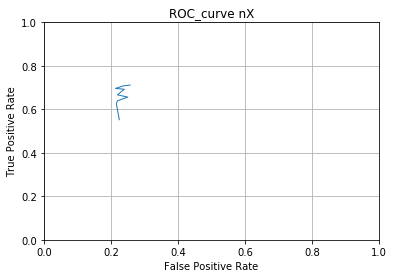

In [169]:


knn_roc_data_sorted = knn_roc_data_nX.sort_values(by='TPR')

plt.Figure(figsize=(5,5))
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve nX')
plt.plot(knn_roc_data_sorted[['FPR']], knn_roc_data_sorted[['TPR']], linewidth= 1)

NameError: name 'knn_roc_data_pX' is not defined

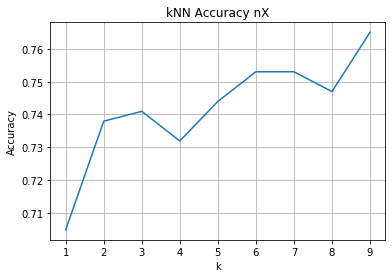

In [170]:
knn_acc_data_nX = knn_roc_data_nX.sort_values(by='k')
plt.figure()
plt.title('kNN Accuracy nX')
plt.plot(knn_acc_data_nX[['k']] ,knn_acc_data_nX[['Acc']])
plt.xticks()
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.savefig((os.path.join(outputdir, 'Project 2 knn acc plot nX') + '.png'), dpi=600)

knn_roc_data_pX.to_csv('knn_roc_data_pX')



explained variance [2.48041253 1.59738095 1.37404835 0.83579611 0.73098451]
explained variance ratio [0.32635416 0.21017146 0.18078702 0.10996781 0.09617748]
explained variance cumulative 0.9234579289762805
components_ [[ 0.23824647  0.33048405  0.45463374  0.3357816   0.56198278  0.30819309
   0.32213375]
 [-0.57268811 -0.00519075 -0.07263412  0.2590656   0.52982657 -0.11509554
  -0.55285396]
 [-0.13685027  0.16589171 -0.40443143 -0.02784219 -0.11249456  0.87449985
  -0.10957623]
 [ 0.38993405  0.02139677 -0.76363214  0.33069184  0.27511307 -0.22989404
   0.16267761]
 [-0.16254856  0.91972606 -0.09356672 -0.12794062 -0.17331114 -0.26929063
   0.00205477]]


kNN time to complete: 3.3241734504699707 seconds
   FN  FP   TN  TP
0  49  57  174  52


C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


kNN time to complete: 2.7256152629852295 seconds
   FN  FP   TN  TP
0  25  79  198  30


kNN time to complete: 2.7065958976745605 seconds
   FN  FP   TN  TP
0  34  60  189  49


kNN time to complete: 2.402316093444824 seconds
   FN  FP   TN  TP
0  16  76  207  33


kNN time to complete: 2.560443878173828 seconds
   FN  FP   TN  TP
0  25  67  198  42


kNN time to complete: 2.39629864692688 seconds
   FN  FP   TN  TP
0  16  81  207  28


kNN time to complete: 2.3041982650756836 seconds
   FN  FP   TN  TP
0  27  71  196  38


kNN time to complete: 2.7496485710144043 seconds
   FN  FP   TN  TP
0  17  79  206  30


kNN time to complete: 2.956836462020874 seconds
   FN  FP   TN  TP
0  24  74  199  35


kNN time to complete: 2.3942980766296387 seconds
   FN  FP   TN  TP
0  18  80  205  29


kNN time to complete: 2.544440507888794 seconds
   FN  FP   TN  TP
0  21  74  202  35


kNN time to complete: 2.267174482345581 seconds
   FN  FP   TN  TP
0  19  78  204  31


kNN time to complete: 2.208118200302124 seconds
   FN  FP   TN  TP
0  24  73  199  36


kNN time to complete: 2.3342363834381104 seconds
   FN  FP   TN  TP
0  16  78  207  31


kNN time to complete: 2.3382437229156494 seconds
   FN  FP   TN  TP
0  21  71  202  38


kNN time to complete: 2.378270149230957 seconds
   FN  FP   TN  TP
0  18  74  205  35


kNN time to complete: 3.1290009021759033 seconds
   FN  FP   TN  TP
0  19  71  204  38


kNN time to complete: 2.8537373542785645 seconds
   FN  FP   TN  TP
0  16  75  207  34


kNN time to complete: 2.7616493701934814 seconds
   FN  FP   TN  TP
0  21  71  202  38


kNN time to complete: 2.780665636062622 seconds
   FN  FP   TN  TP
0  15  75  208  34


kNN time to complete: 2.6495425701141357 seconds
   FN  FP   TN  TP
0  21  72  202  37


kNN time to complete: 2.530435562133789 seconds
   FN  FP   TN  TP
0  18  73  205  36


kNN time to complete: 2.31221866607666 seconds
   FN  FP   TN  TP
0  21  70  202  39


kNN time to complete: 2.261168956756592 seconds
   FN  FP   TN  TP
0  18  76  205  33


kNN time to complete: 2.4443445205688477 seconds
   FN  FP   TN  TP
0  23  69  200  40


kNN time to complete: 2.270190954208374 seconds
   FN  FP   TN  TP
0  17  76  206  33


kNN time to complete: 2.3222296237945557 seconds
   FN  FP   TN  TP
0  20  71  203  38


kNN time to complete: 2.2301409244537354 seconds
   FN  FP   TN  TP
0  16  74  207  35


kNN time to complete: 2.1190199851989746 seconds
   FN  FP   TN  TP
0  18  72  205  37


kNN time to complete: 2.170070171356201 seconds
   FN  FP   TN  TP
0  15  73  208  36
         Acc  FN  FP       FPR   TN  TP       TPR     k
0   0.680723  49  57  0.246753  174  52  0.514851   1.0
1   0.686747  25  79  0.285199  198  30  0.545455   2.0
6   0.704819  27  71  0.265918  196  38  0.584615   7.0
2   0.716867  34  60  0.240964  189  49  0.590361   3.0
8   0.704819  24  74  0.271062  199  35  0.593220   9.0
12  0.707831  24  73  0.268382  199  36  0.600000  13.0
9   0.704819  18  80  0.280702  205  29  0.617021  10.0
11  0.707831  19  78  0.276596  204  31  0.620000  12.0
10  0.713855  21  74  0.268116  202  35  0.625000  11.0
4   0.722892  25  67  0.252830  198  42  0.626866   5.0
24  0.722892  23  69  0.256506  200  40  0.634921  25.0
5   0.707831  16  81  0.281250  207  28  0.636364   6.0
20  0.719880  21  72  0.262774  202  37  0.637931  21.0
7   0.710843  17  79  0.277193  206  30  0.638298   8.0
18  0.722892  21  71  0.260073  202  38  0.644068  19.0
14  0.722892  21  

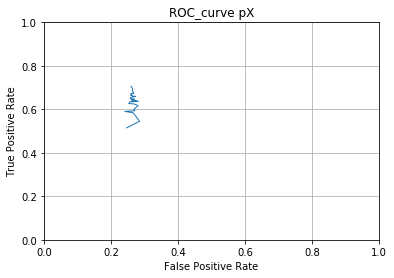

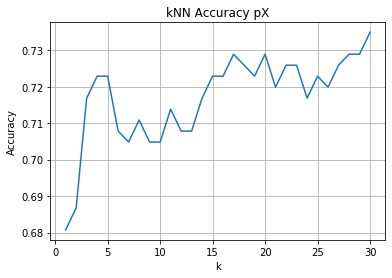

In [240]:
pimate_pX_sk = pca(pimate_nX,class_column='diabetes')

knn_roc_data_pX = pd.DataFrame(columns = ['k','TP', 'FP', 'TN','FN', 'TPR','FPR','Acc'])

for i in np.arange(1,31):
    pX_data_kNN = Kens_kNNnew(df_training=pimatr_pX_sk,df_testing=pimate_pX_sk, k=i,class_column='diabetes')
    df_errors_types = error_rates(truecol=pX_data_kNN['diabetes'], testcol=pX_data_kNN['kNN_class'])
    knn_roc_data_pX = knn_roc_data_pX.append(df_errors_types,
                        ignore_index=True, # ignores index labels
                        sort=True)
    knn_roc_data_pX['k'].iloc[i-1] = i
print(knn_roc_data_pX.sort_values(by='TPR'))
#def ROC_curve(df_train, df_test):

knn_roc_data_sorted_pX = knn_roc_data_pX.sort_values(by='TPR')

plt.Figure(figsize=(5,5))
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve pX')
plt.plot(knn_roc_data_sorted_pX[['FPR']], knn_roc_data_sorted_pX[['TPR']], linewidth= 1)

knn_acc_data_pX = knn_roc_data_pX.sort_values(by='k')
plt.figure()
plt.grid()
plt.title('kNN Accuracy pX')
plt.plot(knn_acc_data_pX[['k']] ,knn_acc_data_pX[['Acc']])
plt.xticks()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.savefig((os.path.join(outputdir, 'Project 2 knn acc plot pX') + '.png'), dpi=600)


knn_roc_data_pX.to_csv('knn_roc_data_pX')


In [172]:
knn_roc_data_pX.to_csv('knn_roc_data_pX.csv')

(200, 7)
(200,)
[1.0362893]
[[-0.40963682 -1.16487405  0.03185011  0.01492697 -0.46437769 -0.5892693
  -0.52814779]]


kNN time to complete: 2.1850976943969727 seconds
   FN  FP   TN  TP
0  50  58  173  51


C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


kNN time to complete: 2.121034622192383 seconds
   FN  FP   TN  TP
0  29  75  194  34


kNN time to complete: 2.107020854949951 seconds
   FN  FP   TN  TP
0  45  49  178  60


kNN time to complete: 2.0920071601867676 seconds
   FN  FP   TN  TP
0  28  58  195  51


kNN time to complete: 2.0749905109405518 seconds
   FN  FP   TN  TP
0  33  48  190  61


kNN time to complete: 2.0459625720977783 seconds
   FN  FP   TN  TP
0  19  56  204  53


kNN time to complete: 2.036954402923584 seconds
   FN  FP   TN  TP
0  28  43  195  66


kNN time to complete: 2.032949447631836 seconds
   FN  FP   TN  TP
0  19  55  204  54


kNN time to complete: 2.0309581756591797 seconds
   FN  FP   TN  TP
0  33  40  190  69


kNN time to complete: 2.0259320735931396 seconds
   FN  FP   TN  TP
0  21  52  202  57


kNN time to complete: 2.0219521522521973 seconds
   FN  FP   TN  TP
0  29  46  194  63


kNN time to complete: 2.006927013397217 seconds
   FN  FP   TN  TP
0  20  59  203  50


kNN time to complete: 2.001922369003296 seconds
   FN  FP   TN  TP
0  25  51  198  58


kNN time to complete: 1.9969172477722168 seconds
   FN  FP   TN  TP
0  14  63  209  46


kNN time to complete: 1.9949147701263428 seconds
   FN  FP   TN  TP
0  24  49  199  60


kNN time to complete: 1.998917579650879 seconds
   FN  FP   TN  TP
0  16  57  207  52


kNN time to complete: 2.0049359798431396 seconds
   FN  FP   TN  TP
0  21  45  202  64


kNN time to complete: 2.0349502563476562 seconds
   FN  FP   TN  TP
0  16  53  207  56


kNN time to complete: 2.009929656982422 seconds
   FN  FP   TN  TP
0  20  48  203  61


kNN time to complete: 2.008915901184082 seconds
   FN  FP   TN  TP
0  14  60  209  49


kNN time to complete: 2.0079269409179688 seconds
   FN  FP   TN  TP
0  21  53  202  56


kNN time to complete: 1.9939002990722656 seconds
   FN  FP   TN  TP
0  12  63  211  46


kNN time to complete: 1.9919102191925049 seconds
   FN  FP   TN  TP
0  21  52  202  57


kNN time to complete: 1.998927116394043 seconds
   FN  FP   TN  TP
0  17  56  206  53


kNN time to complete: 1.9969282150268555 seconds
   FN  FP   TN  TP
0  19  53  204  56


kNN time to complete: 2.0309581756591797 seconds
   FN  FP   TN  TP
0  15  57  208  52


kNN time to complete: 1.983912467956543 seconds
   FN  FP   TN  TP
0  20  52  203  57


kNN time to complete: 1.9789104461669922 seconds
   FN  FP   TN  TP
0  14  56  209  53


kNN time to complete: 2.0369515419006348 seconds
   FN  FP   TN  TP
0  19  52  204  57


kNN time to complete: 1.998918056488037 seconds
   FN  FP   TN  TP
0  14  54  209  55
         Acc  FN  FP       FPR   TN  TP       TPR     k
0   0.674699  50  58  0.251082  173  51  0.504950   1.0
1   0.686747  29  75  0.278810  194  34  0.539683   2.0
2   0.716867  45  49  0.215859  178  60  0.571429   3.0
3   0.740964  28  58  0.229249  195  51  0.645570   4.0
4   0.756024  33  48  0.201681  190  61  0.648936   5.0
8   0.780120  33  40  0.173913  190  69  0.676471   9.0
10  0.774096  29  46  0.191667  194  63  0.684783  11.0
12  0.771084  25  51  0.204819  198  58  0.698795  13.0
6   0.786145  28  43  0.180672  195  66  0.702128   7.0
11  0.762048  20  59  0.225191  203  50  0.714286  12.0
14  0.780120  24  49  0.197581  199  60  0.714286  15.0
20  0.777108  21  53  0.207843  202  56  0.727273  21.0
22  0.780120  21  52  0.204724  202  57  0.730769  23.0
9   0.780120  21  52  0.204724  202  57  0.730769  10.0
5   0.774096  19  56  0.215385  204  53  0.736111   6.0
7   0.777108  19  

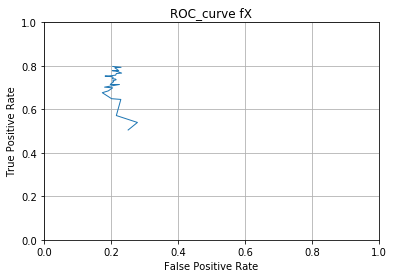

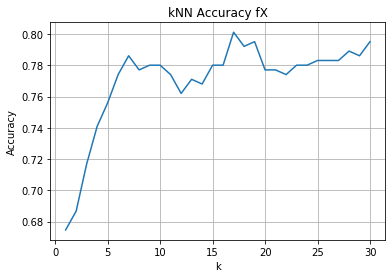

In [173]:
#pimatr_fX = pd.DataFrame(pimatr_fX)
#pimate_fX = pd.DataFrame(pimate_fX)

df_pimatr_fX, df_pimate_fX, pimatr_fX, pimatr_fX_sk_target, Wv_fX_tr = sk_LDA(train_df=pimatr_nX,test_df=pimate_nX)


knn_roc_data_fX = pd.DataFrame(columns = ['k','TP', 'FP', 'TN','FN', 'TPR','FPR','Acc'])

for i in np.arange(1,31):
    fX_data_kNN =Kens_kNNnew(df_training=df_pimatr_fX,df_testing=df_pimate_fX, k=i,class_column='diabetes')
    df_errors_types = error_rates(truecol=fX_data_kNN['diabetes'], testcol=fX_data_kNN['kNN_class'])
    knn_roc_data_fX = knn_roc_data_fX.append(df_errors_types,
                        ignore_index=True, # ignores index labels
                        sort=True)
    knn_roc_data_fX['k'].iloc[i-1] = i
print(knn_roc_data_fX.sort_values(by='TPR'))
#def ROC_curve(df_train, df_test):

knn_roc_data_sorted_fX = knn_roc_data_fX.sort_values(by='TPR')

plt.Figure(figsize=(5,5))
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve fX')
plt.plot(knn_roc_data_sorted_fX[['FPR']], knn_roc_data_sorted_fX[['TPR']], linewidth= 1)

knn_acc_data_fX = knn_roc_data_fX.sort_values(by='k')
plt.figure()
plt.grid()
plt.title('kNN Accuracy fX')
plt.plot(knn_acc_data_fX[['k']] ,knn_acc_data_fX[['Acc']])
plt.xticks()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.savefig((os.path.join(outputdir, 'Project 2 knn acc plot fX') + '.png'), dpi=600)


In [ ]:
knn_roc_data_fX.to_csv('knn_roc_data_fX.csv')


In [258]:

# Mu
nX_mu_class1 = np.mean(pimatr_nX[pimatr_nX['diabetes']== 'Yes'], axis=0)
nX_mu_class2 = np.mean(pimatr_nX[pimatr_nX['diabetes']== 'No'], axis=0)

pX_mu_class1 = np.mean(pimatr_pX_sk[pimatr_pX_sk['diabetes']== 'Yes'], axis=0)
pX_mu_class2 = np.mean(pimatr_pX_sk[pimatr_pX_sk['diabetes']== 'No'], axis=0)

fX_mu_class1 = np.mean(df_pimatr_fX[df_pimatr_fX['diabetes']== 'Yes'], axis=0)
fX_mu_class2 = np.mean(df_pimatr_fX[df_pimatr_fX['diabetes']== 'No'], axis=0)

# Covarience matrix
#df_testing_num = pd.DataFrame(pimatr_nX.select_dtypes(include=np.number))

nX_S_class1 = covnum(pd.DataFrame(pimatr_nX[pimatr_nX['diabetes']== 'Yes']))
nX_S_class2 = covnum(pd.DataFrame(pimatr_nX[pimatr_nX['diabetes']== 'No']))

print(nX_S_class1)

pX_S_class1 = np.cov(pd.DataFrame(pimatr_pX_sk.select_dtypes(include=np.number))[pimatr_pX_sk['diabetes']== 'Yes'])
pX_S_class2 = np.cov(pd.DataFrame(pimatr_pX_sk.select_dtypes(include=np.number))[pimatr_pX_sk['diabetes']== 'No'])

fX_S_class1 = np.cov(pd.DataFrame(df_pimatr_fX.select_dtypes(include=np.number))[df_pimatr_fX['diabetes']== 'Yes'])
fX_S_class2 = np.cov(pd.DataFrame(df_pimatr_fX.select_dtypes(include=np.number))[df_pimatr_fX['diabetes']== 'No'])

case_1_nX = euclidist(X=pimate_nX, muv1=nX_mu_class1, muv2=nX_mu_class2,class_column='diabetes')
case_1_pX = euclidist(X=pimate_pX_sk, muv1=pX_mu_class1, muv2=pX_mu_class2,class_column='diabetes')
case_1_fX = euclidist(X=df_pimate_fX, muv1=fX_mu_class1, muv2=fX_mu_class2,class_column='diabetes')

case_1_nX_errors = error_rates(truecol=case_1_nX['diabetes'], testcol=case_1_nX['case_1_class'])
case_1_pX_errors = error_rates(truecol=case_1_pX['diabetes'], testcol=case_1_pX['case_1_class'])
case_1_fX_errors = error_rates(truecol=case_1_fX['diabetes'], testcol=case_1_fX['case_1_class'])

print(pd.DataFrame(nX_S_class1))

case_2_nX = mahalanobisdist2(X=pimate_nX, E1=nX_S_class1, E2=nX_S_class2, muv1=nX_mu_class1, muv2=nX_mu_class2)

print(case_1_nX_errors)
print(case_1_pX_errors)
print(case_1_fX_errors)


# change this here so i can change it back later...
#dict ={0: 'Yes',1:'No'}

#case_1_nX = case_1_nX..replace(dict)

#print(case_1_pX)


          0         1         2         3         4         5         6
0  1.399492 -0.077303  0.167098 -0.013190 -0.050304 -0.129258  0.596667
1 -0.077303  0.909251  0.065553  0.236894  0.051676 -0.008487  0.168071
2  0.167098  0.065553  1.023365  0.147146  0.073677 -0.226682  0.209820
3 -0.013190  0.236894  0.147146  1.106380  0.395519  0.097082  0.208363
4 -0.050304  0.051676  0.073677  0.395519  0.618997  0.244242 -0.118188
5 -0.129258 -0.008487 -0.226682  0.097082  0.244242  1.372335 -0.124401
6  0.596667  0.168071  0.209820  0.208363 -0.118188 -0.124401  1.099625
time to complete: 0.00900888442993164 seconds
time to complete: 0.008008718490600586 seconds
time to complete: 0.0050046443939208984 seconds
   FN  FP   TN  TP       TPR       FPR       Acc
0  54  32  169  77  0.587786  0.159204  0.740964
   FN  FP   TN  TP     TPR       FPR      Acc
0  56  37  167  72  0.5625  0.181373  0.71988
   FN  FP   TN  TP       TPR       FPR       Acc
0  48  28  175  81  0.627907  0.137931  0.77

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Degrees of freedom <= 0 for slice


AttributeError: 'str' object has no attribute 'T'

In [176]:
import matplotlib.pyplot as plt
import numpy as np
print(Wv)

slope = Wv[:,1]/Wv[:,0]

num_cols = pimatr_nX.columns[pimatr_nX.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
nX_num = pimatr_nX[num_cols]


#np.dot(nX_num, Wv)

# Plot point
plt.plot(nX_num.iloc[:, :], nX_num.iloc[:, :], 'bo')
plt.plot(nX_num.iloc[5:, :], nX_num.iloc[5:, :], 'ro')
plt.plot([-1, 10], [-slope, 10*slope], color='k', linestyle='-', linewidth=1)

DP = np.multiply(np.transpose(np.dot(nX_num, Wv)), (np.divide(Wv , (np.dot(Wv,Wv)))

# Plot projected points
plt.plot(DP[0:5, 0], DP[0:5, 1], 'bs')
plt.plot(DP[5:, 0], DP[5:, 1], 'rs')
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

SyntaxError: invalid syntax (<ipython-input-176-c84d7c53f2a4>, line 21)

In [177]:
####
def Kens_kNN_old(trX, X, k, column_name):
    start = time.time()

    kNNlist = []

    def rowply(row):
        Xrow = pd.DataFrame(row.iloc[:9])
        #print(Xrow)
        trXnum = pd.DataFrame(trX.iloc[:, :9])

        # *** MAKE SURE TO ALIGN DATAFRAMES SO THEY BROADCAST PROPERLY!!!!! such as: Xrow.T ****
        # 2 hours or more to figure that out!!

        Xdist = pd.DataFrame(np.sqrt(np.sum(np.power(np.subtract(trXnum, Xrow.T), 2), axis=1)))
        Xdist.rename(columns={0: 'dist'}, inplace=True)
        trdataX = pd.concat([Xdist, trX[column_name]], axis=1)
        test1 = trdataX.nsmallest(n=k, columns='dist', keep='first')

        test2 = test1.groupby([column_name]).size().reset_index()

        test2.rename(columns={0: 'count'}, inplace=True)

        test3 = test2.nlargest(n=1, columns='count', keep='first')

        kNNlist.append(test3[column_name].values)

        return

    X.apply(rowply, axis=1)

    kNNclasslistapp = pd.DataFrame(np.concatenate(kNNlist),index=X.index)
    kNNclasslistapp.rename(columns={0: 'kNN_class'}, inplace=True)
    Xout = pd.concat([X, kNNclasslistapp], axis=1)
    end = time.time()
    #print('kNN time to complete:', end - start, 'seconds')
    return Xout


def Kens_kNN(trX, X, k):
    start = time.time()

    kNNlist = []
    def rowply(row):
        Xrow = pd.DataFrame(row.iloc[:6]) #selects a row
        trXnum = pd.DataFrame(trX.iloc[:, :6]) # selects all training data
        # *** MAKE SURE TO ALIGN DATAFRAMES SO THEY BROADCAST PROPERLY!!!!! such as: Xrow.T ****
        # 2 hours or more to figure that out!!
        
        Xdist = pd.DataFrame(np.sqrt(np.sum(np.power(np.subtract(trXnum, Xrow.T),2),axis=1)))
        Xdist.rename(columns= {0:'dist'}, inplace=True)
        trdataX = pd.concat([Xdist,trX['diabetes']], axis=1)        
        test1 = trdataX.nsmallest(n=k, columns='dist', keep= 'first')
        
        test2 = test1.groupby('diabetes').size().reset_index()

        test2.rename(columns={0:'count'},inplace=True)

        test3 = test2.nlargest(n=1, columns='count', keep='first')
        
        kNNlist.append(test3['diabetes'].values)
             
        
        return
    
    X.apply(rowply, axis=1)
   
    kNNclasslistapp = pd.DataFrame(np.concatenate(kNNlist))
    kNNclasslistapp.rename(columns={0:'kNN_class'},inplace=True)
    Xout =  pd.concat([X,kNNclasslistapp], axis=1)
    end = time.time()
    print ('kNN time to complete:', end - start, 'seconds')
    return Xout


    

nX_data_kNN = Kens_kNN(pimatr_nX,pimate_nX, k=20)
                
    
print (nX_data_kNN.head(10))


kNN time to complete: 2.4083213806152344 seconds
      npreg       glu        bp      skin       bmi       ped       age  \
0  0.723679  0.760733  0.064624  0.494645  0.210961  0.542444  1.634094   
1 -0.765373 -1.233698 -0.459354 -0.018384 -0.933790 -0.358176 -0.101389   
2 -0.765373 -1.107067 -0.459354 -0.531413 -0.688486 -0.958588 -1.014801   
3 -0.169752 -1.455301 -1.856628  0.238131 -0.214232 -0.694276 -0.558095   
4 -0.467562  2.311957 -0.110035  1.349694 -0.296000 -0.987956  1.908117   
5  0.425869  1.330570  0.064624 -0.873432 -1.064618  0.411919  1.725435   
6 -1.063183 -0.188996  1.112579  1.520703  2.206099  0.294447 -0.101389   
7 -0.765373 -0.663861 -3.603220  0.751160  1.797259 -0.906379  0.081294   
8 -0.169752  0.064265  1.461898  1.007674  1.143116  0.793703 -0.466753   
9  1.617110 -0.157338  0.763261  0.494645 -0.541304 -0.645330 -0.284071   

  diabetes kNN_class  
0      Yes       Yes  
1       No        No  
2       No        No  
3      Yes        No  
4      Yes

In [178]:


def error_rates_old(truecol, testcol):
    dict = {'Yes': 0,'No':1}
    test = np.array(testcol.replace(dict))
    np.reshape(test,(-1,1))
    
    truth = np.array(truecol.replace(dict))
    truth.reshape(-1,1)
    
    #table = (truth == 1) & (test == 0)
   # print(table)


    #discriminator
    conditions = [(truth == 0) & (test == 0),
                  (truth == 0) & (test == 1),
                  (truth == 1) & (test == 1),
                  (truth == 1) & (test == 0)] 
    choices = ['TP', 'FP', 'TN','FN']
    error_def = np.select(conditions,choices)
    
    #'True Positive Rate (TPR) or Sensitivity = TP / (TP + FN)'
    #'True Negative Rate (TNR) or Specificity = TN / (FP + TN)'
    #rate = error_def.groupby('error2', as_index=False).size()

    #the pandas groupby function was used to get the total counts of the errors for each class
    labels,count = np.unique(error_def, return_counts=True)
    df_rates = pd.DataFrame(count,index=labels)
    df_rates_t = df_rates.T
    
    print(df_rates_t)
    df_rates_t['TPR'] = (df_rates_t['TP'])/(df_rates_t['TP'] + df_rates_t['FN'])
    df_rates_t['TNR']  = (df_rates_t['TN'])/(df_rates_t['FP'] + df_rates_t['TN'])
    
    #print(df_rates_t)

    return df_rates_t

#knn_roc_data = pd.DataFrame(columns=('TP', 'FP', 'TN','FN'))

for i in np.arange(1,15):
    nX_data_kNN = Kens_kNN2(pimatr_nX,pimate_nX, k=i)
    df_errors_types = error_rates(truecol=nX_data_kNN['diabetes'], testcol=nX_data_kNN['kNN_class'])
    pd.concat(knn_roc_data,df_errors_types)
print(knn_roc_data)
#def ROC_curve(df_train, df_test):
 

NameError: name 'Kens_kNN2' is not defined

In [179]:
eigvalsclass0, eigvecsclass0 = np.linalg.eig(trS0)
eigvalsclass1, eigvecsclass1 = np.linalg.eig(trS1)

pd.DataFrame(eigvalsclass0)
pd.DataFrame(eigvecsclass0)

eigpairsclass0 = [(np.abs(eigvalsclass0[i]), eigvecsclass0[:,i]) for i in range(len(eigvalsclass0))]
eigpairsclass1 = [(np.abs(eigvalsclass1[i]), eigvecsclass1[:,i]) for i in range(len(eigvalsclass1))]

eigpairsclass0.sort(key=lambda x: x[0], reverse=True)
eigpairsclass1.sort(key=lambda x: x[0], reverse=True)

pd.DataFrame(eigpairsclass0)
pd.DataFrame(eigpairsclass1)

matrixWclass0 = np.hstack((eigpairsclass0[0][1].reshape(7,1),
                      eigpairsclass0[1][1].reshape(7,1)))


matrixWclass1 = np.hstack((eigpairsclass1[0][1].reshape(7,1),
                      eigpairsclass1[1][1].reshape(7,1)))

pd.DataFrame(matrixWclass0)
pd.DataFrame(matrixWclass1)



def errorchk(X):
    conditions = (X['diabetes'] == X['kNN_class'], X['diabetes'] != X['kNN_class'])
    choices = ('correct', 'error')
    X['error1'] = np.select(conditions,choices)
    print(X.groupby('error1').size().reset_index())
    return X

errorchk(nX_data_kNN)


NameError: name 'trS0' is not defined

In [184]:
trclass0 = pimatr_nX_cl0.iloc[:, 0:7]
trclass1 = pimatr_nX_cl1.iloc[:, 0:7]

trmu0 = np.mean(trclass0)
trmu1 = np.mean(trclass1)

trE0 = np.cov(trclass0,rowvar=False)
trE1 = np.cov(trclass1,rowvar=False)

trS0= np.dot((len(pimatr_nX_cl0) - 1), trE0)
trS1= np.dot((len(pimatr_nX_cl1) - 1), trE1)

trSw= trS0+trS1

trSwinv= np.linalg.inv(trSw)

trv = np.dot(trSwinv,(trmu0-trmu1))

Y0 = np.outer(trv,trclass0)
Y1 = np.outer(trv, trclass1)

print('Normalized Mean')
pd.DataFrame(trmu0)
pd.DataFrame(trE0)
pd.DataFrame(trS0)
pd.DataFrame(trSw)
pd.DataFrame(trSwinv)
pd.DataFrame(trv)
pd.DataFrame(Y0)

Normalized Mean


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
0,0.002092,0.004606,-0.000225,0.000663,-0.002415,-0.001990,0.004282,0.000872,-0.001749,0.000848,...,0.002073,-0.000145,0.002037,0.002702,0.002012,-0.001656,-0.000563,0.000566,0.000550,0.002599
1,0.005950,0.013097,-0.000641,0.001885,-0.006867,-0.005659,0.012178,0.002480,-0.004973,0.002411,...,0.005896,-0.000414,0.005794,0.007684,0.005721,-0.004710,-0.001601,0.001610,0.001563,0.007390
2,-0.000163,-0.000358,0.000018,-0.000052,0.000188,0.000155,-0.000333,-0.000068,0.000136,-0.000066,...,-0.000161,0.000011,-0.000158,-0.000210,-0.000156,0.000129,0.000044,-0.000044,-0.000043,-0.000202
3,-0.000076,-0.000168,0.000008,-0.000024,0.000088,0.000073,-0.000156,-0.000032,0.000064,-0.000031,...,-0.000076,0.000005,-0.000074,-0.000098,-0.000073,0.000060,0.000021,-0.000021,-0.000020,-0.000095
4,0.002372,0.005221,-0.000255,0.000751,-0.002738,-0.002256,0.004855,0.000989,-0.001982,0.000961,...,0.002350,-0.000165,0.002310,0.003063,0.002281,-0.001878,-0.000638,0.000642,0.000623,0.002946
5,0.003010,0.006625,-0.000324,0.000954,-0.003474,-0.002863,0.006160,0.001255,-0.002516,0.001220,...,0.002983,-0.000209,0.002931,0.003887,0.002894,-0.002383,-0.000810,0.000814,0.000791,0.003738
6,0.002697,0.005938,-0.000291,0.000855,-0.003114,-0.002566,0.005521,0.001125,-0.002255,0.001093,...,0.002673,-0.000188,0.002627,0.003484,0.002594,-0.002135,-0.000726,0.000730,0.000709,0.003350


In [181]:
pX_data_kNN = Kens_kNN2(pimatr_pX,pimate_pX, k=1)

errorchk(df=pX_data_kNN, 
         truecol=pX_data_kNN['diabetes'], 
         testcol=pX_data_kNN['kNN_class'], 
         title='kNN for pX', 
         x=pX_data_kNN.iloc[:,0:1],
         y=pX_data_kNN.iloc[:,1:2])


fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = pX_data_kNN['Principal Component 1']
y = pX_data_kNN['Principal Component 2']
z = pX_data_kNN['Principal Component 3']
c= ['red' if i == 'Yes' else 'green' for i in pX_data_kNN['diabetes']]


ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

nX_data_kNN = Kens_kNN2(pimatr_nX,pimate_nX, k=1)
print(nX_data_kNN)
errorchk(df=nX_data_kNN, 
         truecol=nX_data_kNN['diabetes'], 
         testcol=nX_data_kNN['kNN_class'], 
         title='kNN for nX', 
         x=nX_data_kNN.iloc[:,0:1],
         y=nX_data_kNN.iloc[:,1:2])



NameError: name 'Kens_kNN2' is not defined

In [182]:

# OLD COPY
def error_rates_old(truecol, testcol):
    dict = {'Yes': 0,'No':1}
    test = np.array(testcol.replace(dict))
    np.reshape(test,(-1,1))
    
    truth = np.array(truecol.replace(dict))
    truth.reshape(-1,1)
    
    #table = (truth == 1) & (test == 0)
   # print(table)


    #discriminator
    conditions = [(truth == 0) & (test == 0),
                  (truth == 0) & (test == 1),
                  (truth == 1) & (test == 1),
                  (truth == 1) & (test == 0)] 
    choices = ['TP', 'FP', 'TN','FN']
    error_def = np.select(conditions,choices)
    
    #'True Positive Rate (TPR) or Sensitivity = TP / (TP + FN)'
    #'True Negative Rate (TNR) or Specificity = TN / (FP + TN)'
    #rate = error_def.groupby('error2', as_index=False).size()

    #the pandas groupby function was used to get the total counts of the errors for each class
    labels,count = np.unique(error_def, return_counts=True)
    df_rates = pd.DataFrame(count,index=labels)
    df_rates_t = df_rates.T
    
    print(df_rates_t)
    df_rates_t['TPR'] = (df_rates_t['TP'])/(df_rates_t['TP'] + df_rates_t['FN'])
    df_rates_t['FPR']  = (df_rates_t['FP'])/(df_rates_t['FP'] + df_rates_t['TN'])
    df_rates_t['Acc']  =  (df_rates_t['TN'] + df_rates_t['TP'])/(df_rates_t['TN']+df_rates_t['TP']+df_rates_t['FN']+ df_rates_t['FP']) 
    
    #print(df_rates_t)

    return df_rates_t


def Kens_kNN2(trX, X, k):
    start = time.time()

    kNNlist = []
    def rowply(row):
        Xrow = pd.DataFrame(row.iloc[:6])
        trXnum = pd.DataFrame(trX.iloc[:, :6])
               
        # *** MAKE SURE TO ALIGN DATAFRAMES SO THEY BROADCAST PROPERLY!!!!! such as: Xrow.T ****
        # 2 hours or more to figure that out!!

        Xdist = pd.DataFrame(np.sqrt(np.sum(np.power(np.subtract(trXnum, Xrow.T),2),axis=1)))
        Xdist.rename(columns= {0:'dist'}, inplace=True)
        trdataX = pd.concat([Xdist,trX['diabetes']], axis=1)        
        test1 = trdataX.nsmallest(n=k, columns='dist', keep= 'first')
        
        test2 = test1.groupby('diabetes').size().reset_index()

        test2.rename(columns={0:'count'},inplace=True)

        test3 = test2.nlargest(n=1, columns='count', keep='first')
        
        kNNlist.append(test3['diabetes'].values)
             
        
        return
    
    X.apply(rowply, axis=1)
   
    kNNclasslistapp = pd.DataFrame(np.concatenate(kNNlist))
    kNNclasslistapp.rename(columns={0:'kNN_class'},inplace=True)
    Xout =  pd.concat([X,kNNclasslistapp], axis=1)
    end = time.time()
    print ('kNN time to complete:', end - start, 'seconds')
    return Xout


    
 